In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from src.utils import load_data
from src.quality_metrics import compute_quality_metrics


In [2]:
review, metadata = load_data('Digital_Music')

In [3]:
user_features = review.groupby('reviewerID').agg({
    'overall': ['mean', 'count'],
}).reset_index()
user_features.columns = ['reviewerID', 'avg_rating', 'num_reviews']


scaler = StandardScaler()
user_features_scaled = scaler.fit_transform(user_features[['avg_rating', 'num_reviews']])

In [4]:
def elbow_method(ufs, max_clusters=11):
    wcss = [] 
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(ufs)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10,5))
    plt.plot(range(1, max_clusters), wcss, marker='o', linestyle='--')
    plt.title('Méthode du Coude')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('WCSS')
    plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
user_features['cluster'] = kmeans.fit_predict(user_features_scaled)

/Users/stanley.schillaci/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


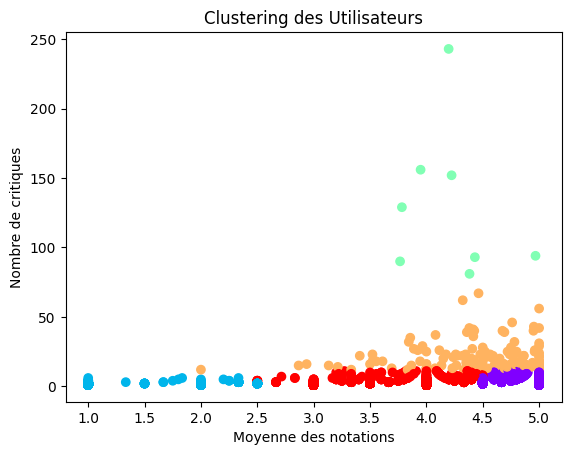

In [6]:
plt.scatter(user_features['avg_rating'], user_features['num_reviews'], c=user_features['cluster'], cmap='rainbow')
plt.xlabel('Moyenne des notations')
plt.ylabel('Nombre de critiques')
plt.title('Clustering des Utilisateurs')
plt.show()


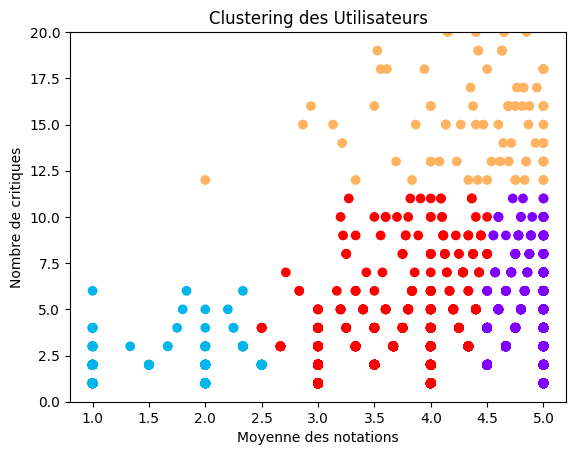

In [7]:
plt.scatter(user_features['avg_rating'], user_features['num_reviews'], c=user_features['cluster'], cmap='rainbow')
plt.xlabel('Moyenne des notations')
plt.ylabel('Nombre de critiques')
plt.title('Clustering des Utilisateurs')
plt.ylim(0, 20)
plt.show()


In [11]:
metric_df, sil_score = compute_quality_metrics(user_features, review, 'reviewerID', 'avg_rating', 'num_reviews', user_features_scaled)

In [12]:
metric_df

,Cluster_ID,Cluster_Size,Coverage,Diversity,Frequency
0,0,55373,0.762168,0.052195,1.208838
1,4,12048,0.165832,0.458772,1.319638
2,1,5090,0.070060,0.491623,1.136149
3,3,133,0.001831,0.535404,21.451128
4,2,8,0.000110,0.396494,129.750000


In [13]:
sil_score

0.7938790084518001